# Exploratory Data Analysis on Video Game Dataset

In [ ]:
#Let's start off by importing our necessary Python libraries
import numpy as np # for linear algebra
import pandas as pd # for data preparation
import plotly.express as px # for data visualization
from textblob import TextBlob # for sentiment analysis
from datetime import date # for date-time-conversion

df = pd.read_csv('all_video_games(cleaned).csv')
df.shape

In [4]:
df.columns

Index(['Title', 'Release Date', 'Developer', 'Publisher', 'Genres',
       'Genres Splitted', 'Product Rating', 'User Score', 'User Ratings Count',
       'Platforms Info'],
      dtype='object')

In [5]:
df.head()

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."


Let's clean up this table a little more. Clearing out all rows with NaN values as this would not really allow us to analyze the User Ratings of the video games by setting it to 0 instead.

In [124]:
df = df.fillna(0)

In [195]:
df

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."
...,...,...,...,...,...,...,...,...,...,...
14050,Dragon Age: Origins - Awakening,3/16/2010,BioWare,Electronic Arts,Western RPG,"['Western', 'RPG']",Rated M For Mature,8.0,516.0,"[{'Platform': 'PlayStation 3', 'Platform Metas..."
14051,Lover Pretend,12/1/2022,Idea Factory,Aksys Games,Visual Novel,"['Visual', 'Novel']",Rated T For Teen,NaN,NaN,"[{'Platform': 'Nintendo Switch', 'Platform Met..."
14052,Alice: Madness Returns,6/14/2011,Spicy Horse,Electronic Arts,Survival,['Survival'],Rated M For Mature,8.3,276.0,"[{'Platform': 'PC', 'Platform Metascore': '75'..."
14053,Concrete Genie,10/8/2019,Pixel Opus,Sony Interactive Entertainment,Third-Person Adventure,"['Third-Person', 'Adventure']",Rated E +10 For Everyone +10,8.1,480.0,"[{'Platform': 'PlayStation 4', 'Platform Metas..."


### Let's start analyzing the video game data

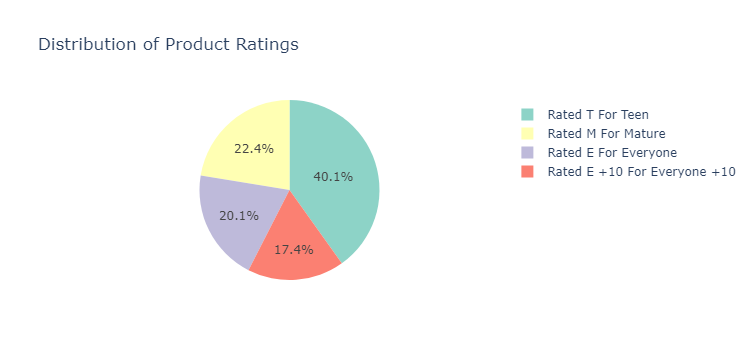

In [91]:
z1 = df.groupby(['Product Rating']).size().reset_index(name='counts')
pieChart = px.pie(z,values='counts', names='Product Rating',title='Distribution of Product Ratings', color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

As shown by the Pie Chart, a majority of content released this year is rated T for Teen. What about genres? 

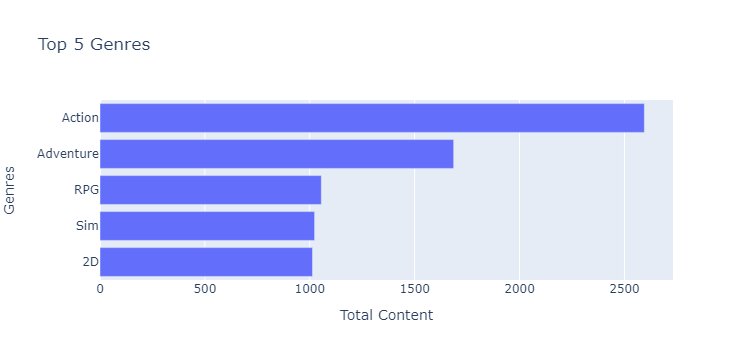

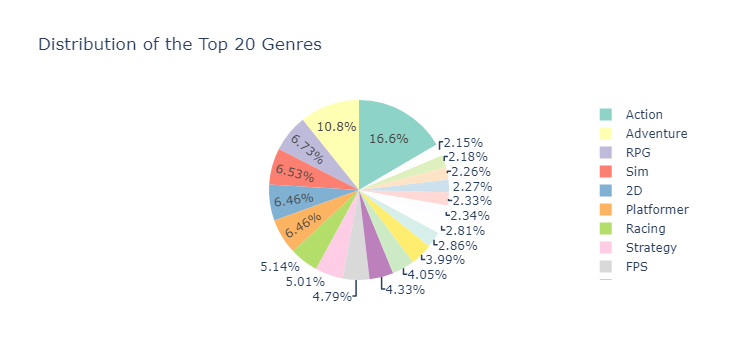

In [96]:
df['Genres'] = df['Genres'].fillna('No Genre Specified') #Taking care of the NaN
filtered_genres = pd.DataFrame()
filtered_genres = df['Genres'].str.split(' ',expand=True).stack()
filtered_genres = filtered_genres.to_frame()
filtered_genres.columns=['Genres']
genres=filtered_genres.groupby(['Genres']).size().reset_index(name='Total Content')
genres=genres.sort_values(by=['Total Content'], ascending=False)
genresTop=genres.head()
genresTop=genresTop.sort_values(by=['Total Content'])
fig1=px.bar(genresTop, x='Total Content', y='Genres',  title='Top 5 Genres')
fig1.show()
genresTop20 = genres.head(20)
fig2 = px.pie(genresTop20,values='Total Content', names='Genres',title='Distribution of the Top 20 Genres', color_discrete_sequence=px.colors.qualitative.Set3)
fig2.show()

As show above the top genres are Action and Adventure. With Action leading with a total of 2595 games falling the category. Adventure following with 1686 games, RPG in third with 1055 games, Sim in fourth with 1023 games and 2D games in fifth with 1013 games.

As shown by the following pie chart though the action genre had the most games we can see that it only accounts for 16.6% of the top 20 genres.

### Let's look at the Developers

What about the developers? Which companies were the most prolific? 

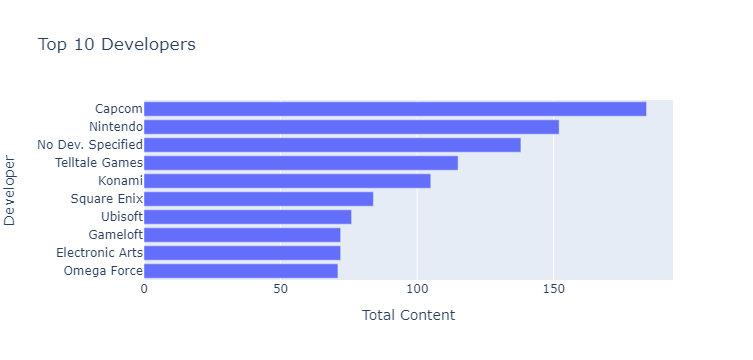

In [98]:
df['Developer'] = df['Developer'].fillna('No Dev. Specified') #Taking care of the NaN
DfDevs = pd.DataFrame()
DfDevs = df['Developer']
DfDevs = DfDevs.to_frame()
DfDevs.columns=['Developer']
Devs=DfDevs.groupby(['Developer']).size().reset_index(name='Total Content')
Devs=Devs.sort_values(by=['Total Content'], ascending=False)
DevsTop=Devs.head(10)
DevsTop=DevsTop.sort_values(by=['Total Content'])
fig3=px.bar(DevsTop, x='Total Content', y='Developer',  title='Top 10 Developers')
fig3.show()

As shown Nintendo is the most prolific game developer. 

### Let's take a look at User Ratings

Let's look into the most popular game and the highest rated game for the year (2023) in recent gaming history. The most popular game takes into account both the user score and the user ratings count. Whereas the highest rated games just looks at the user score. 

In [1]:
#Let's convert these Release Date strings into Datetime objects first
df['Release Date'] = pd.to_datetime(df['Release Date'])
recent_games = df.copy()
recent_games = recent_games[df['Release Date'].dt.year >= 2023]

recent_games['Total Ratings'] = recent_games['User Score']*recent_games['User Ratings Count']
recent_games = recent_games.dropna()
fig = px.scatter(recent_games, x='User Score', y='User Ratings Count',size="Total Ratings", color='Title', log_x=True, size_max=60,title='Most Popular Game and Genre over the years')
fig.show(render='iframe')

NameError: name 'pd' is not defined

Based on the graph we can see that when looking at Total Ratings, User Score, and User Ratings Count. For the year 2023, the game Baldur's Gate 3, out did all other games. Most interesting parts of this graph include Starfield which had a lower User Score but a large amount of ratings. Indicating that a lot of people played the game but did not feel as good about it compared to other games. IT should also be noted that while Marvel's Spider-Man 2 had a higher rating than Baldur's Gate 3 did not have nearly as much reviews.

It should also be noted that Baldur's Gate 3 won Game of the Year! A few of the nominees are also visible in this particular data set (Alan Wake 2, Resident Evil 4, and Marvel's Spider-man 2). As seen by the following table a little more clearly. 

Sources: 
https://thegameawards.com/nominees/game-of-the-year

In [65]:
recent_games=recent_games.sort_values(by=['Total Ratings', 'User Score', 'User Ratings Count], ascending=False)
recent_games.head(10)

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info,Total Ratings
520,Pikmin 4,2023-07-21,Nintendo,Nintendo,Real-Time Strategy,"['Real-Time', 'Strategy']",Rated E +10 For Everyone +10,9.0,750.0,"[{'Platform': 'Nintendo Switch', 'Platform Met...",6750.0
6827,Marvel's Spider-Man 2,2023-10-20,Insomniac Games,Sony Interactive Entertainment,Open-World Action,"['Open-World', 'Action']",Rated T For Teen,9.0,7367.0,"[{'Platform': 'PlayStation 5', 'Platform Metas...",66303.0
3211,Hi-Fi Rush,2023-01-25,Tango Gameworks,Bethesda Softworks,3D Platformer,"['3D', 'Platformer']",Rated T For Teen,8.9,3343.0,"[{'Platform': 'Xbox Series X', 'Platform Metas...",29752.7
12387,Baldur's Gate 3,2023-08-03,Larian Studios Games,Larian Studios Games,Western RPG,"['Western', 'RPG']",Rated M For Mature,8.9,15511.0,"[{'Platform': 'PC', 'Platform Metascore': '96'...",138047.9
1741,Agatha Christie - Murder on the Orient Express,2023-10-19,Microids Studio Lyon,Microids,Third-Person Adventure,"['Third-Person', 'Adventure']",Rated T For Teen,8.8,31.0,"[{'Platform': 'PlayStation 5', 'Platform Metas...",272.8
1753,Alan Wake II,2023-10-27,Remedy Entertainment,Epic Games,Survival,['Survival'],Rated M For Mature,8.8,2014.0,"[{'Platform': 'PlayStation 5', 'Platform Metas...",17723.2
2581,Sonic Superstars,2023-10-17,Arzest,Sega,2D Platformer,"['2D', 'Platformer']",Rated E For Everyone,8.8,594.0,"[{'Platform': 'PlayStation 5', 'Platform Metas...",5227.2
11674,Kirby's Return to Dream Land Deluxe,2023-02-24,HAL Labs,Nintendo,2D Platformer,"['2D', 'Platformer']",Rated E +10 For Everyone +10,8.8,109.0,"[{'Platform': 'Nintendo Switch', 'Platform Met...",959.2
6406,Xenoblade Chronicles 3: Expansion Pass Wave 4 ...,2023-04-25,Monolith Soft,Nintendo,Action RPG,"['Action', 'RPG']",Rated T For Teen,8.8,361.0,"[{'Platform': 'Nintendo Switch', 'Platform Met...",3176.8
811,Metroid Prime Remastered,2023-02-08,Retro Studios,Nintendo,FPS,['FPS'],Rated T For Teen,8.7,1241.0,"[{'Platform': 'Nintendo Switch', 'Platform Met...",10796.7
